In [129]:
import numpy as np
import scipy.io as scio
import os
from collections import Counter
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/OCT_drd_images/'

In [88]:
def get_slice_variations(data_dir, train_or_test = "test"):
    '''
    gets the variations in number of slices per patient
    '''
    slice_variations = []
    #get the subfolders for the different labels
    sub_folders = os.listdir(data_dir + train_or_test)

    counter = 0 
    for sub in sub_folders:
        print(sub)
        file_names = os.listdir(data_dir + train_or_test +  "/" + sub)
        for files in file_names:
            counter += 1
            slices = 0
            #get the unqie patient ID
            search_string = files.split('-')[1]
            #count number of slices per this patient
            for names in file_names: 
                if search_string in names:
                    slices = slices + 1
            #bookkeep the number of slices observed
            slice_variations.append(slices)
    #print(slice_variations)
    print(counter)
    print(max(slice_variations))
    print(min(slice_variations))

    print("Distribution of slices per patient is {}, slices:\
    number of patients with this number of slices".format(Counter(slice_variations)))
    return(slice_variations)


# Below are plots of the distrbution of slices in the data

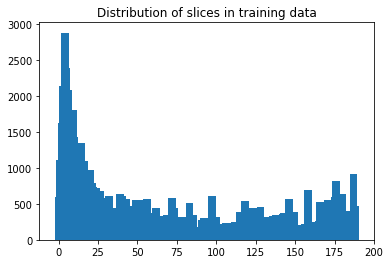

In [80]:
labels, values = zip(*Counter(slice_variations).items())
indexes = np.arange(len(labels))
width = 5

plt.bar(indexes, values, width)
plt.title("Distribution of slices in training data")
plt.show()

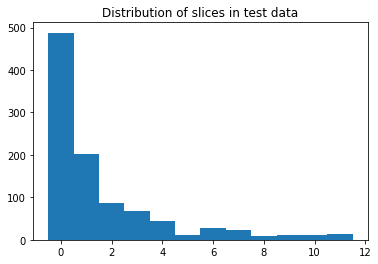

In [84]:
labels, values = zip(*Counter(slice_variations).items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.title("Distribution of slices in test data")
plt.show()

# Visualize images from different number of slices

image name is 12494


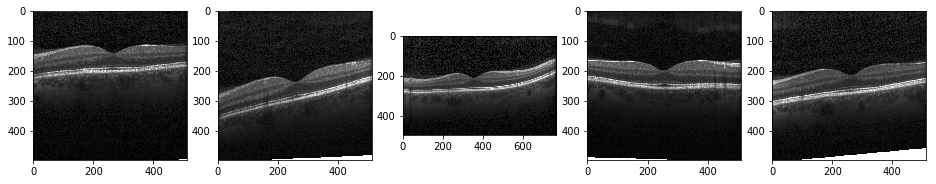

In [117]:
#plotting all slices of ime 12494
file_names = os.listdir(data_dir + "test/" + "NORMAL")

image_names = []
for names in file_names:
    if "12494" in names:
        #print(names)
        image_names.append(names)

def plotThreeImages(data_dir, image_names):
    print("image name is {}".format(image_names[0].split("-")[1]))
    plt.figure(figsize=(16,16))
    plt.subplot(151)
    plt.imshow(cv2.imread(data_dir + image_names[0]))
    plt.subplot(152)
    plt.imshow(cv2.imread(data_dir + image_names[1]))
    plt.subplot(153)
    plt.imshow(cv2.imread(data_dir + image_names[2]))
    plt.subplot(154)
    plt.imshow(cv2.imread(data_dir + image_names[3]))
    plt.subplot(155)
    plt.imshow(cv2.imread(data_dir + image_names[4]))

img_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/OCT_drd_images/test/NORMAL/'
plotThreeImages(img_dir, image_names)

NORMAL-3300015-1.jpeg


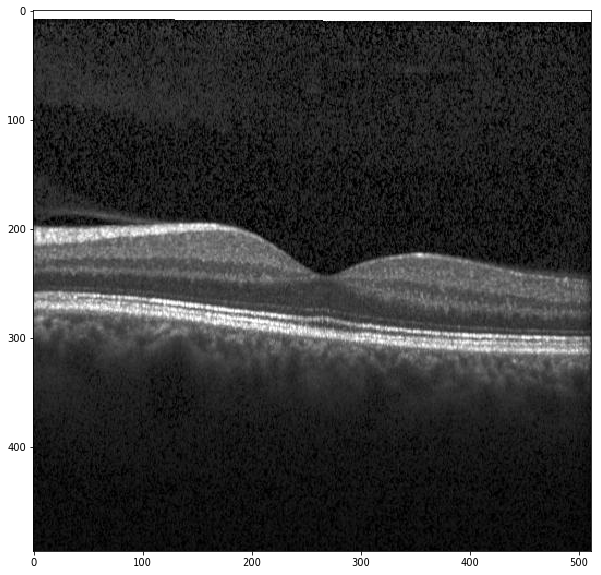

In [128]:
#plotting all slices of ime 12494
file_names = os.listdir(data_dir + "test/" + "NORMAL/")

image_names = []
for names in file_names:
    if "3300015" in names:
        print(names)
        image_names.append(names)

plt.figure(figsize=(10,10))
plt.imshow(cv2.imread(data_dir+"test/NORMAL/"+image_names[0]))


In [170]:
imageSize = 400
image_names = []
for names in file_names:
    if "12494" in names:
        #print(names)
        image_names.append(names)
X =[]
for image_filename in image_names:
            img_file = cv2.imread(data_dir + "test/" + 'NORMAL/' + image_filename)
            if img_file is not None:
                img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                img_arr = np.asarray(img_file)
                X.append(img_arr)

X = np.asarray(X)
X.shape

(5, 400, 400, 3)